# Исследование сервиса аренды самокатов GoFast
Переданы данные о некоторых пользователях из нескольких городов, а также об их поездках.  Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:

без подписки 
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra

- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

В ходе исследований необходимо выполнить:

- предоработку данных (выяления дубликатов, обработка пропущенных значений и устранение выбросов)
- провести исследовательский анализ
- выполнить подсчет выручки
- проверить гипотезы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
data_users_go = pd.read_csv('/datasets/users_go.csv')
data_users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
data_users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
data_rides_go = pd.read_csv('/datasets/rides_go.csv')
data_rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
data_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
data_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
data_subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
data_subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


По первому знакомству с данными:
- пропущенныех значений нет
- все столбцы соответствуют типу данных, кроме столбца 'date' в датефрейме '/datasets/rides_go.csv', необходимо привести к типу datetime

#### Шаг 2. Предобработка данных

In [8]:
data_rides_go['date'] = pd.to_datetime(data_rides_go['date'], format = '%Y-%m-%d')
data_rides_go['month'] = data_rides_go['date'].dt.month
data_rides_go['date'].dt.year.unique()

array([2021])

In [9]:
data_users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [10]:
data_users_go.duplicated().sum()

31

In [11]:
data_users_go = data_users_go.drop_duplicates().reset_index(drop=True)

In [12]:
data_rides_go.duplicated().sum()

0

Неявных дубликатов не выявлено. Явные дубликаты в датафрейме '/datasets/users_go.csv' были удалены (их немного и на результат исследолвания не повлияет)

#### Шаг 3. Исследовательский анализ данных

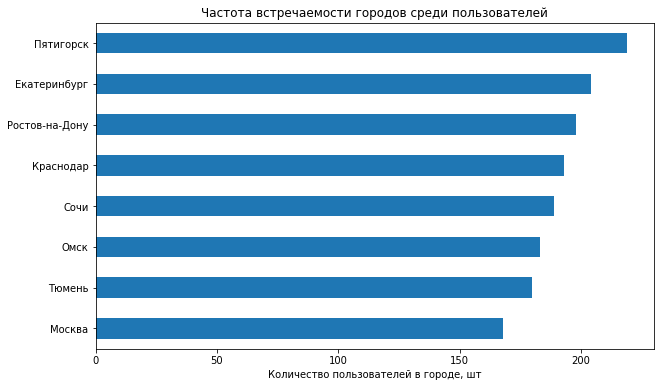

In [13]:
data_users_go['city'].value_counts(ascending = True).plot(kind = 'barh', figsize = (10,6));
plt.title('Частота встречаемости городов среди пользователей');
plt.xlabel('Количество пользователей в городе, шт');

Больше всего сервисом пользуются в Пятигорске, меньше всего в Москве.

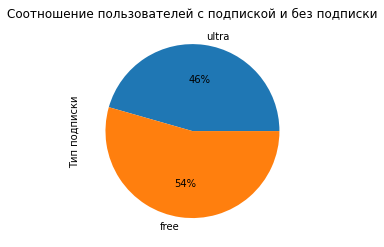

In [14]:
data_users_go['subscription_type'].value_counts(ascending = True).plot(kind='pie', autopct='%1.0f%%');
plt.title('Соотношение пользователей с подпиской и без подписки');
plt.ylabel('Тип подписки');

54% пользователей пользуются сервисом без подписки

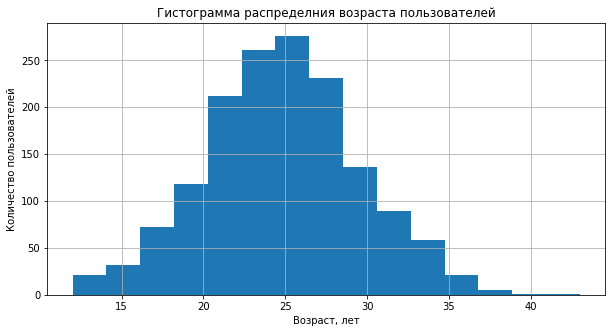

In [15]:
data_users_go['age'].hist(bins = 15, figsize = (10,5));
plt.title('Гистограмма распределния возраста пользователей');
plt.xlabel('Возраст, лет');
plt.ylabel('Количество пользователей');

Сервис больше всего пользуется спросом для людей в возрасте от 20 до 30 лет.

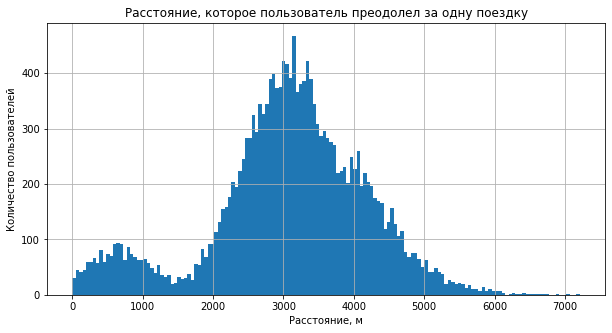

In [16]:
data_rides_go['distance'].hist(bins = 150, figsize = (10,5));
plt.title('Расстояние, которое пользователь преодолел за одну поездку');
plt.xlabel('Расстояние, м');
plt.ylabel('Количество пользователей');

In [17]:
data_rides_go['distance'].mean()

3070.6599756818814

В среднем пользователь проезжает 3070м за поездку. Но есть странные значения возле нуля, которые могут свидетельствовать, что пользователь сразу завершал поездку. Это возможно связано с зарядом самоката.

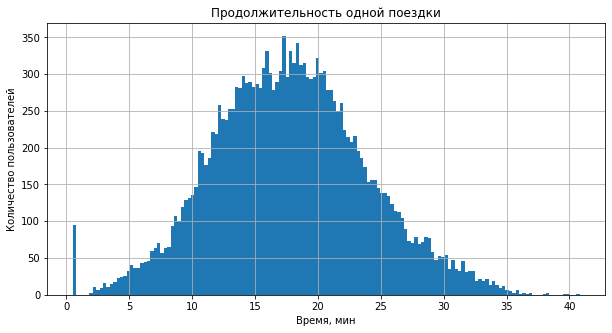

In [18]:
data_rides_go['duration'].hist(bins = 150, figsize = (10,5));
plt.title('Продолжительность одной поездки');
plt.xlabel('Время, мин');
plt.ylabel('Количество пользователей');

In [19]:
data_rides_go['duration'].mean()

17.80501119798444

В среднем на поездку уходит примерно 18мин. Здесь также есть нулевые значения, что говорит об мгновенном завершени поездки.

#### Шаг 4. Объединение данных

In [20]:
df_1 = data_users_go.merge(data_rides_go, on='user_id')
df_1.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [21]:
df_all = df_1.merge(data_subscriptions_go, on='subscription_type')
df_all.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [23]:
df_free = df_all.query('subscription_type == "free"')
df_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [24]:
df_ultra = df_all.query('subscription_type == "ultra"')
df_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


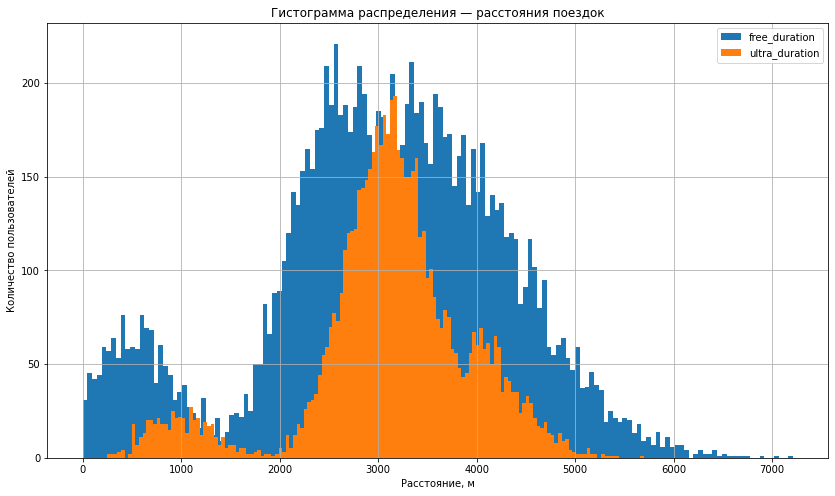

In [25]:
df_free['distance'].hist(bins = 150, figsize = (14,8));
df_ultra['distance'].hist(bins = 150, figsize = (14,8));
plt.title('Гистограмма распределения — расстояния поездок');
plt.legend(['free_duration', 'ultra_duration']);
plt.xlabel('Расстояние, м');
plt.ylabel('Количество пользователей');

Из гистограммы видно, что большинство поездок совершается без подписки. Среднее расстояния пользователей с подпиской и без примерно равно, но отклонение у потльзователей с подпиской значительно меньше. 

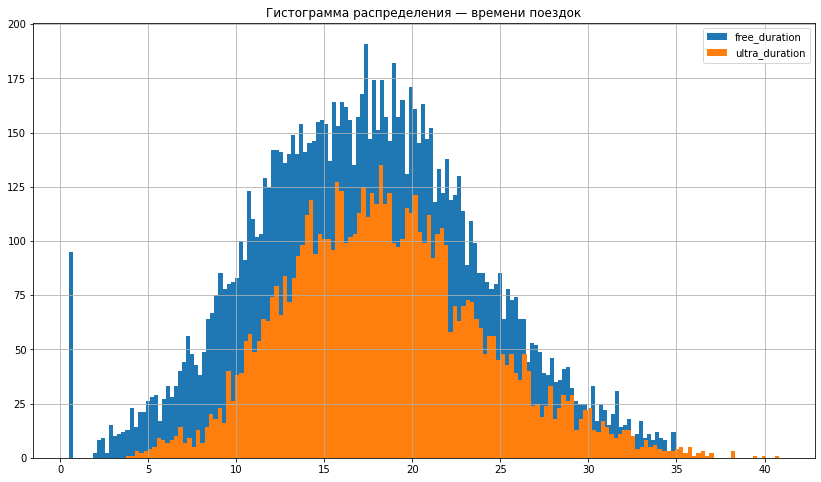

In [26]:
df_free['duration'].hist(bins = 150, figsize = (14,8));
df_ultra['duration'].hist(bins = 150, figsize = (14,8));
plt.title('Гистограмма распределения — времени поездок');
plt.legend(['free_duration', 'ultra_duration']);

Распределния схожи по всем параметрам. Как и было выше сказанно поездок без подписки больше.

#### Шаг 5. Подсчёт выручки

In [27]:
df_aggregated = df_all.pivot_table(index=['user_id','month'], 
                            values=['distance', 'duration', 'name', 'subscription_type'], 
                            aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min'})
df_aggregated.columns = ['total_distance', 'total_duration', 'trip_count', 'subscription_type']
df_aggregated = df_aggregated.round(1).reset_index()
df_aggregated.head(10)

,user_id,month,total_distance,total_duration,trip_count,subscription_type
0,1,1,7027.5,41.4,2,ultra
1,1,4,754.2,6.2,1,ultra
2,1,8,6723.5,44.8,2,ultra
3,1,10,5809.9,31.6,2,ultra
4,1,11,7003.5,53.4,3,ultra
5,1,12,6751.6,27.2,2,ultra
6,2,3,10187.7,61.0,3,ultra
7,2,4,6164.4,39.0,2,ultra
8,2,6,3255.3,13.9,1,ultra
9,2,7,6780.7,46.2,2,ultra


In [28]:
def income_func (row):
    if row['user_id'] in df_ultra['user_id'].values:
        return (6 * np.ceil(row['total_duration']) + 199)
    elif row['user_id'] in df_free['user_id'].values:
        return (8 * np.ceil(row['total_duration']) + 50 * row['trip_count'])

In [29]:
df_aggregated['income_month'] = df_aggregated.apply(income_func, axis=1)
df_aggregated.head(10)

,user_id,month,total_distance,total_duration,trip_count,subscription_type,income_month
0,1,1,7027.5,41.4,2,ultra,451.0
1,1,4,754.2,6.2,1,ultra,241.0
2,1,8,6723.5,44.8,2,ultra,469.0
3,1,10,5809.9,31.6,2,ultra,391.0
4,1,11,7003.5,53.4,3,ultra,523.0
5,1,12,6751.6,27.2,2,ultra,367.0
6,2,3,10187.7,61.0,3,ultra,565.0
7,2,4,6164.4,39.0,2,ultra,433.0
8,2,6,3255.3,13.9,1,ultra,283.0
9,2,7,6780.7,46.2,2,ultra,481.0


#### Шаг 6. Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Н0: пользователи с подпиской тратят столько же времени на поездки, сколько и пользователи без подписки, время равно

Н1: пользователи с подпиской тратят больше времени на поездки.

In [30]:
time_ultra = df_ultra['duration']
time_free = df_free['duration']

alpha = 0.05

results = st.ttest_ind(time_ultra, time_free, alternative='greater')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу.


##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Н0: пользователи с подпиской за одну сессию проезжают 3130 метров.

Н1: пользователи с подпиской за одну сессию проезжают расстояние больше 3130 метров.

In [31]:
distance_ultra = df_ultra['distance']
interested_value = 3130

alpha = 0.05  

results = st.ttest_1samp(distance_ultra, interested_value, alternative='greater')
print(f'p-value:, {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

p-value:, 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу.


##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Н0: помесячная выручка пользователей с подпиской не отличается от пользователй без подписки

Н1: помесячная выручка пользователей с подпиской выше чем без неё 

In [32]:
income_month_ultra = df_aggregated[df_aggregated['subscription_type'] == 'ultra']['income_month']
income_month_free = df_aggregated[df_aggregated['subscription_type'] == 'free']['income_month']

alpha = 0.05

results = st.ttest_ind(income_month_ultra, income_month_free, alternative='greater')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу")

p-value: 1.8550604780127757e-35
Отвергаем нулевую гипотезу


##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Чтобы проверить гипотезу о том, что количество обращений в службу технической поддержки значительно уменьшилось после обновления сервера, нужно использовать метод scipy.stats.ttest_rel(before, after). Этот тест подходит, если у нас есть данные для одной и той же группы пользователей до и после определенного события или вмешательства.

H0: после обновления серверов для мобильного приложения количество обращений осталось прежним

H1: после обновления серверов для мобильного приложения количество обращений изменилось

#### Вывод

1) В ходе исследовательского анализ:

- больше всего пользователей в Пятигорске чуть более 200 человек
- 54% пользователей пользуются сервисом без подписки
- сервис больше всего пользуется спросом для людей в возрасте от 20 до 30 лет
- в среднем на поездку уходит примерно 18мин. Здесь также есть нулевые значения, что говорит об мгновенном завершени поездки

2) При проверке гипотез были приняты решения:

- тратят ли пользователи с подпиской больше времени на поездки, отвергаем данную гипотезу
- расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, не отвергаем нулевую гипотезу
- проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, отвергаем данную гипотезу
